In [1]:
import stella
import numpy as np
import matplotlib.pyplot as plt
from lightkurve.search import search_targetpixelfile

In [2]:
stpf = search_targetpixelfile('tic'+str(44743153), mission='TESS').download_all()

In [25]:
time = np.zeros((len(stpf),15803))
flux = np.zeros((len(stpf),15803))
err  = np.zeros((len(stpf),15803))
for i in range(len(stpf)):
    lc = stpf[i].to_lightcurve().flatten(window_length=15).normalize()
    for j in range(15803):
        time[i][j] = lc.time[j]
        flux[i][j] = lc.flux[j]
        err[i][j]  = lc.flux_err[j]

In [79]:
slc = stella.SimulateLightCurves(sample_size=1000)
slc.sine_wave()
slc.inject_flares()

100%|██████████| 1000/1000 [02:04<00:00,  7.39it/s]


In [86]:
model = stella.NeuralNetwork(slc)
model.network_model()
model.train_data(epochs=200)

Epoch 1/200
37119/37119 [==============================] - 1s 28us/sample - loss: 0.5632 - acc: 0.7502
Epoch 2/200
37119/37119 [==============================] - 1s 23us/sample - loss: 0.5576 - acc: 0.7512
Epoch 3/200
37119/37119 [==============================] - 1s 25us/sample - loss: 0.5490 - acc: 0.7512
Epoch 4/200
37119/37119 [==============================] - 1s 24us/sample - loss: 0.4240 - acc: 0.8253
Epoch 5/200
37119/37119 [==============================] - 1s 23us/sample - loss: 0.2992 - acc: 0.8964
Epoch 6/200
37119/37119 [==============================] - 1s 24us/sample - loss: 0.2491 - acc: 0.9186
Epoch 7/200
37119/37119 [==============================] - 1s 22us/sample - loss: 0.2436 - acc: 0.9208
Epoch 8/200
37119/37119 [==============================] - 1s 22us/sample - loss: 0.2302 - acc: 0.9255
Epoch 9/200
37119/37119 [==============================] - 1s 21us/sample - loss: 0.2237 - acc: 0.9280
Epoch 10/200
37119/37119 [==============================] - 1s 22us/sampl

37119/37119 [==============================] - 1s 20us/sample - loss: 0.2037 - acc: 0.9374
Epoch 80/200
37119/37119 [==============================] - 1s 22us/sample - loss: 0.1899 - acc: 0.9408
Epoch 81/200
37119/37119 [==============================] - 1s 20us/sample - loss: 0.2125 - acc: 0.9345
Epoch 82/200
37119/37119 [==============================] - 1s 21us/sample - loss: 0.2104 - acc: 0.9348
Epoch 83/200
37119/37119 [==============================] - 1s 21us/sample - loss: 0.2027 - acc: 0.9364
Epoch 84/200
37119/37119 [==============================] - 1s 20us/sample - loss: 0.1945 - acc: 0.9400
Epoch 85/200
37119/37119 [==============================] - 1s 21us/sample - loss: 0.2573 - acc: 0.9128
Epoch 86/200
37119/37119 [==============================] - 1s 20us/sample - loss: 0.1959 - acc: 0.9389
Epoch 87/200
37119/37119 [==============================] - 1s 22us/sample - loss: 0.1909 - acc: 0.9408
Epoch 88/200
37119/37119 [==============================] - 1s 22us/sample - 

37119/37119 [==============================] - 1s 20us/sample - loss: 0.1633 - acc: 0.9501
Epoch 158/200
37119/37119 [==============================] - 1s 21us/sample - loss: 0.1654 - acc: 0.9487
Epoch 159/200
37119/37119 [==============================] - 1s 23us/sample - loss: 0.1770 - acc: 0.9452
Epoch 160/200
37119/37119 [==============================] - 1s 24us/sample - loss: 0.1746 - acc: 0.9465
Epoch 161/200
37119/37119 [==============================] - 1s 23us/sample - loss: 0.1863 - acc: 0.9430
Epoch 162/200
37119/37119 [==============================] - 1s 22us/sample - loss: 0.1683 - acc: 0.9477
Epoch 163/200
37119/37119 [==============================] - 1s 22us/sample - loss: 0.1704 - acc: 0.9478
Epoch 164/200
37119/37119 [==============================] - 1s 22us/sample - loss: 0.1713 - acc: 0.9477
Epoch 165/200
37119/37119 [==============================] - 1s 21us/sample - loss: 0.1716 - acc: 0.9464
Epoch 166/200
37119/37119 [==============================] - 1s 22us/

In [87]:
model.predict(time=time, flux=flux, flux_err=err)

100%|██████████| 2/2 [00:00<00:00,  6.04it/s]


In [88]:
char = stella.FlareCharacterization(nn=model)

In [89]:
tab, preds = char.completeness()

100%|██████████| 1/1 [00:00<00:00,  7.88it/s]


100%|██████████| 1/1 [00:00<00:00,  8.25it/s]


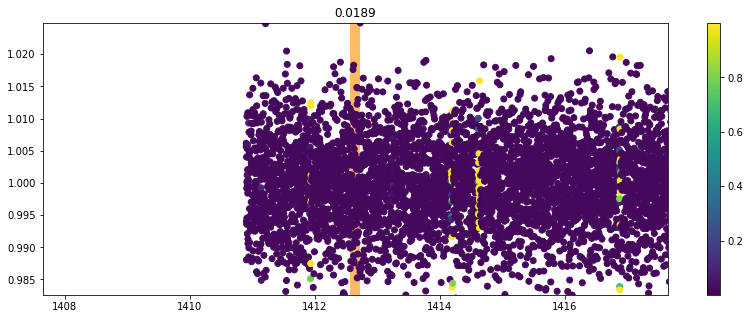

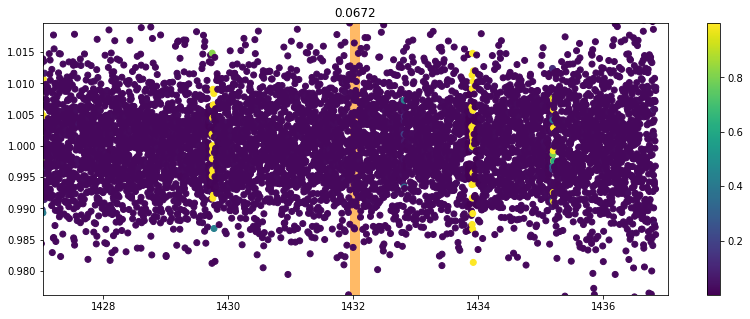

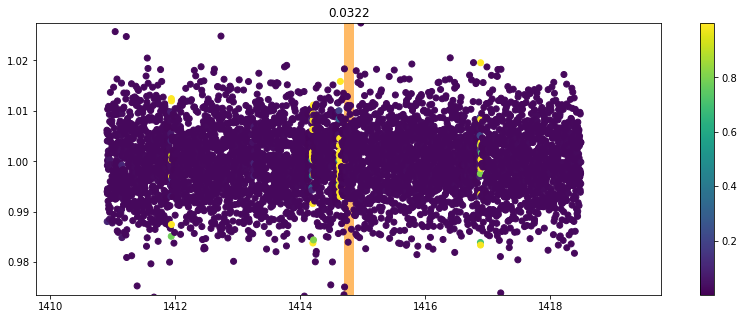

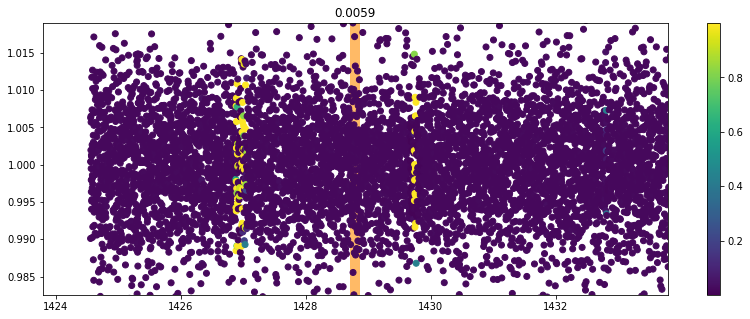

In [ ]:
for i in range(10):
    plt.figure(figsize=(14,5))
    plt.scatter(time[0], flux[0], c=preds[i][0][:,1])
    t = ((time[0] > tab['t0'][i]-0.2) & (time[0] < tab['t0'][i]+0.2))
    plt.vlines(tab['t0'][i], 0, 2, linewidth=10, 
               alpha=0.6, color='darkorange', zorder=0)
    plt.xlim(tab['t0'][i]-5, tab['t0'][i]+5) 
    plt.ylim(np.min(flux[0][t]), np.max(flux[0][t]))
    plt.title(np.round(tab['amplitude'][i],4))
    plt.colorbar()
    plt.show()